# Solid brake disc simulation

In [2]:
import numpy
import sympy
from sympy import *
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

calculate the heat flux in a unite time

In [41]:
# initial parameters of the brake disc
sympy.init_printing()
(F, q, T, r, p_max, pi, r_i, dr, r_o, f_r, n, N) = sympy.symbols('F q T r p_max  pi  r_i  dr  r_o  f_r n  N')

In [4]:
r = sympy.symbols('r', positive = True)
clamping_force = sympy.Eq(F, integrate((2*pi*p_max*r), (r, r_i, r_o)))

In [5]:
clamping_force

$$F=\int_{r_o}^{r_i}2{\pi}p_{max}rdr=2{\pi}p_{max}r_i(r_{o}-r_{i})$$

calculate the heat generation power(heat flux between callipers and discs) 

In [42]:
heat_generation = sympy.Eq(q, integrate((2*pi*r*f_r*p_max*n*2*pi*r*N/60),(r, r_i, r_o)))

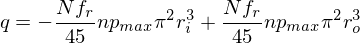

In [43]:
heat_generation 

$$q=\int_{r_o}^{r_i}2{\pi}rf_rp_{max}\left(\frac{n2{\pi}}{60}\right)rNdr$$

In [44]:
P_sol = sympy.solve(heat_generation, q) 

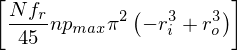

In [45]:
P_sol

In [18]:
# heatflux = P_sol.evalf(subs={pi:numpy.pi, f_r:0.2, n:840, p_max:13e5, N:1, r_i:81.1/1000, r_o:131.1/1000})

$$T_{begin,j}=\frac{q_x}{KA}{\delta_x}+T_{begin+1,j}$$

$$T_{end,j}=\frac{q_x}{KA}{\delta_x}+T_{end-1,j}$$

$$q=KA\frac{{\Delta}T}{{\Delta}X}$$

$$E={\varepsilon}{\delta}T^4$$

In [67]:
q = N*f_r*n*p_max*(numpy.pi**2)*(r_o**3 - r_i**3)/45

In [68]:
q

In [69]:
q_matrix = numpy.ones((ny,1))*q
q_matrix

array([[ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],
       [ 82380.7544149],


In [70]:
def ftcs(T, nt, alpha, dt, dx, dy, K, q, E, A):
    
    for n in range(nt):
        Tn = T.copy()
        T[1:-1,1:-1] = Tn[1:-1, 1:-1] + \
            alpha*dt/dx**2 * (Tn[1:-1,2:] - 2*Tn[1:-1,1:-1] + Tn[1:-1,:-2]) + \
            alpha*dt/dy**2 * (Tn[2:,1:-1] - 2*Tn[1:-1,1:-1] + Tn[:-2,1:-1])
        
        #heat radiation
        varepsilon = 0.5 # infrared emissitivity. 
        delta = 5.76*10**(-8) # boltzmann constant
        E_left = varepsilon*delta*T[:,0]**4
        E_right = varepsilon*delta*T[:,-1]**4
        
        # Neumann Boundary Conditions
        #left boundary
        T[:, 0] = T[:, 1] + q/(K*A) - E_left[:,0]/K
        #right boundary
        T[:,-1] = T[:, -2] + q/(K*A) - E_right[:,-1]/K
        #upper boundary 
        T[-1, :] = T[-2, :]
        #bottom boundary
        T[0, :] = T[1, :]
        
        #check if the brake reach the fail temperature
        if numpy.max(abs(T)) >= 823:
            print("the brake fail at time {0:.2f}s.".format(dt*n))
    if numpy.mas(abs(T)) <=823:
        print("the brake is still working at time {0:.2f}s.".format(dt*n))
    return T

In [71]:
#parameters of the solid brake disc (brembo)
r_i = 81.1/1000 #m    #inner circular radius
r_o = 131.1/1000 #mm    #outor circular radius
b = 11/1000 #mm        #thickness of disc
H = r_o - r_i  #mm width of the disc

nx = 110
ny = 500
nt = 500

x = numpy.linspace(0, b, nx)
y = numpy.linspace(0, H, ny)

dx = b/(nx-1)
dy = H/(ny-1)

alpha = 1e-4 
K = 50    #W/Km thermal conductivity

Ti = numpy.ones((ny, nx))*298   # kelvin temperature

In [72]:
f_r = 0.2
p_max = 13e5 #unite pa
n = 840
N = 1

In [73]:
#surface area of the disc
A = numpy.pi*(r_o**2 - r_i**2)
A

In [64]:
sigma = 0.2
dt = sigma*min(dx, dy)**2/alpha
T = ftcs(Ti.copy(), nt, alpha, dt, dx, dy, K, q, E, A)

SystemError: <built-in function hasattr> returned a result with an error set